In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import json
import psycopg2

In [6]:

with open('db_config.json') as file:
    db_config = json.load(file)


engine = create_engine(f'postgresql+psycopg2://{db_config["user"]}:{db_config["password"]}@{db_config["host"]}:5432/{db_config["dbname"]}')

candidatos = pd.read_sql('SELECT * FROM candidatos', engine)

print(candidatos.head()) 


   first_name   last_name                      email application_date  \
0  Bernadette   Langworth        leonard91@yahoo.com       26/02/2021   
1      Camryn    Reynolds        zelda56@hotmail.com        9/09/2021   
2       Larue      Spinka   okey_schultz41@gmail.com       14/04/2020   
3        Arch      Spinka     elvera_kulas@yahoo.com        1/10/2020   
4       Larue  Altenwerth  minnie.gislason@gmail.com       20/05/2020   

   country  yoe  seniority                         technology  \
0   Norway    2     Intern                      Data Engineer   
1   Panama   10     Intern                      Data Engineer   
2  Belarus    4  Mid-Level                     Client Success   
3  Eritrea   25    Trainee                          QA Manual   
4  Myanmar   13  Mid-Level  Social Media Community Management   

   code_challenge_score  technical_interview_score  
0                     3                          3  
1                     2                         10  
2          

Vamos a revisar la estructura general del dataset

In [7]:
candidatos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   first_name                 50000 non-null  object
 1   last_name                  50000 non-null  object
 2   email                      50000 non-null  object
 3   application_date           50000 non-null  object
 4   country                    50000 non-null  object
 5   yoe                        50000 non-null  int64 
 6   seniority                  50000 non-null  object
 7   technology                 50000 non-null  object
 8   code_challenge_score       50000 non-null  int64 
 9   technical_interview_score  50000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.8+ MB


Most of the data types are suitable for the corresponding columns. However, for a more efficient handling of dates, it would be advisable to convert the Application Date column from object to datetime.

In [8]:
candidatos['application_date'] = pd.to_datetime(candidatos['application_date'])

candidatos.dtypes

C:\Users\JSLV3\AppData\Local\Temp\ipykernel_23868\1841470155.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  candidatos['application_date'] = pd.to_datetime(candidatos['application_date'])


first_name                           object
last_name                            object
email                                object
application_date             datetime64[ns]
country                              object
yoe                                   int64
seniority                            object
technology                           object
code_challenge_score                  int64
technical_interview_score             int64
dtype: object

In [9]:
candidatos.describe()

,application_date,yoe,code_challenge_score,technical_interview_score
count,50000,50000.000000,50000.000000,50000.000000
mean,2020-04-03 23:04:14.592000,15.286980,4.996400,5.003880
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000
25%,2019-02-17 00:00:00,8.000000,2.000000,2.000000
50%,2020-04-06 00:00:00,15.000000,5.000000,5.000000
75%,2021-05-21 00:00:00,23.000000,8.000000,8.000000
max,2022-07-04 00:00:00,30.000000,10.000000,10.000000
std,NaN,8.830652,3.166896,3.165082


The statistical analysis of the candidate dataset shows a wide range of years of experience, ranging from 0 to 30 years, with an average of 15 years, indicating a diverse mix of levels of experience. Both the scores of the code challenge and those of the technical interview have an average of 5 out of 10, which reflects an equitable distribution of technical skills among candidates

In [10]:
missing = candidatos.isnull().sum()
missing = missing[missing > 0]

missing

Series([], dtype: int64)

There is no missing data in any of the columns of the data set. Each column is completely populated, which indicates that the data set is complete

In [11]:
candidatos.isnull().sum()

first_name                   0
last_name                    0
email                        0
application_date             0
country                      0
yoe                          0
seniority                    0
technology                   0
code_challenge_score         0
technical_interview_score    0
dtype: int64

In [12]:
candidatos.duplicated().sum()

0

There are no duplicate rows in the data set

#### Let's understand our candidates

1. Let's see where our candidates come from:

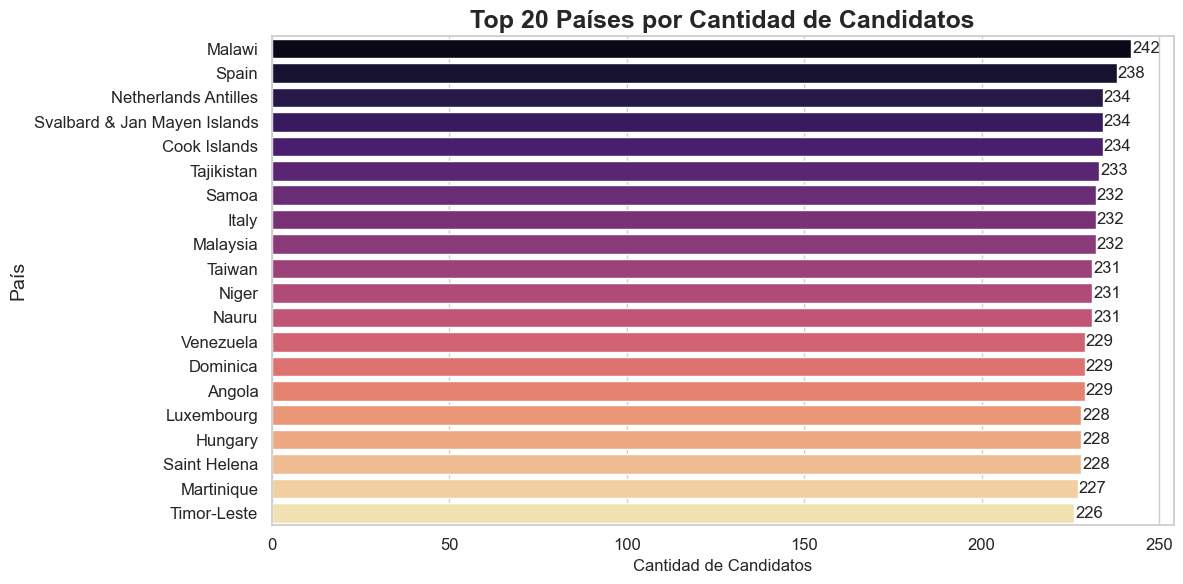

In [13]:
top_countries = candidatos['country'].value_counts().head(20)

sns.set(style="whitegrid", context="notebook", palette="muted")
plt.figure(figsize=(12, 6))

barplot = sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index,
                      palette=sns.color_palette("magma", n_colors=len(top_countries)), dodge=False)


plt.legend([],[], frameon=False)
plt.title('Top 20 Países por Cantidad de Candidatos', fontsize=18, fontweight='bold')
plt.xlabel('Cantidad de Candidatos', fontsize=12)
plt.ylabel('País', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for p in barplot.patches:
    width = p.get_width()  
    plt.text(width + 0.3, p.get_y() + p.get_height() / 2, '{:.0f}'.format(width), ha = 'left', va = 'center', fontsize=12)

plt.tight_layout()
plt.show()



We can observe the countries that are primary sources of candidates, which could indicate regions with a vibrant job market in the technology sector. This can be useful for targeted recruitment strategies, especially if the company is interested in attracting global talent or diversifying its workforce with international perspectives.

What levels of seniority do we find?

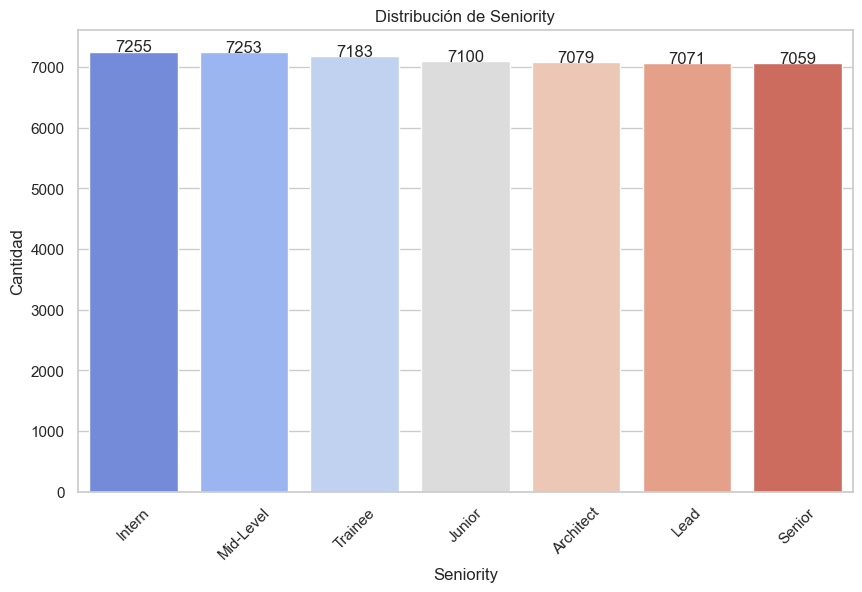

In [14]:
seniority_counts = candidatos['seniority'].value_counts()

plt.figure(figsize=(10, 6))

barplot = sns.barplot(x=seniority_counts.index, y=seniority_counts.values,
                      hue=seniority_counts.index, dodge=False, palette="coolwarm")
plt.legend([],[], frameon=False) 

plt.title('Distribución de Seniority')
plt.xlabel('Seniority')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)

for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:1.0f}'.format(height), ha="center")

plt.show()

This visualization allows us to identify which levels of experience predominate in the talent pool, offering a clear view of the experience composition in the candidate database

Do these seniority levels influence their performance in the tests?

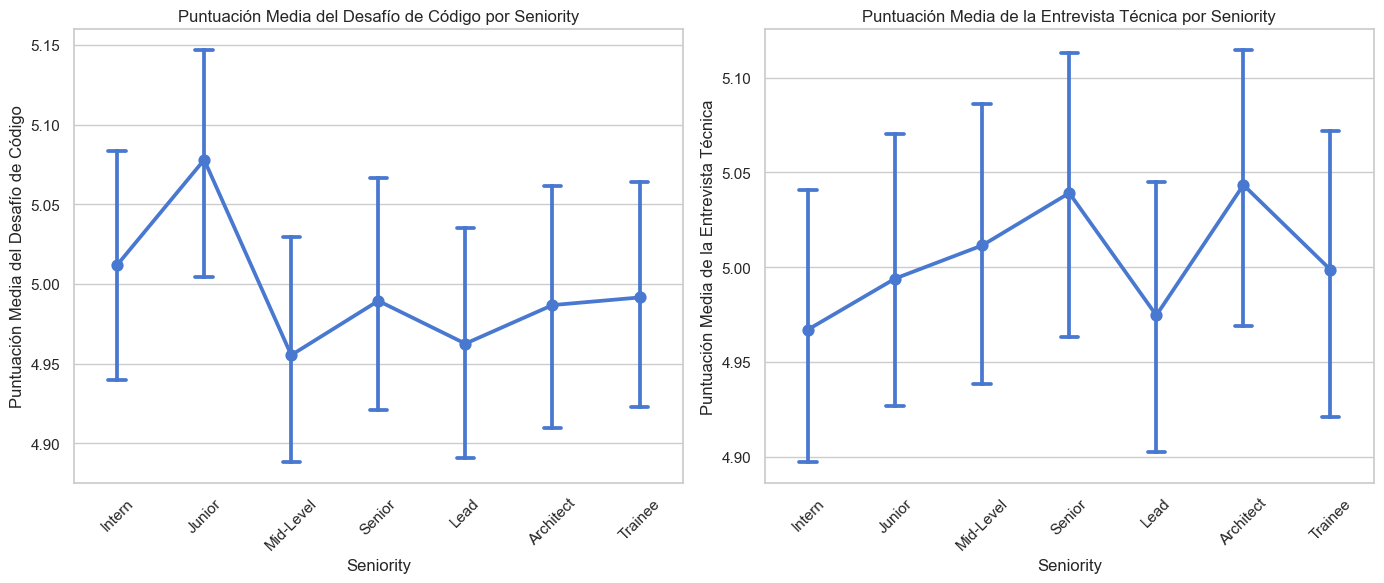

In [15]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)

sns.pointplot(x='seniority', y='code_challenge_score', data=candidatos, capsize=.2, 
              order=['Intern', 'Junior', 'Mid-Level', 'Senior', 'Lead', 'Architect', 'Trainee'])
plt.title('Puntuación Media del Desafío de Código por Seniority')
plt.xlabel('Seniority')
plt.ylabel('Puntuación Media del Desafío de Código')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)

sns.pointplot(x='seniority', y='technical_interview_score', data=candidatos, capsize=.2, 
              order=['Intern', 'Junior', 'Mid-Level', 'Senior', 'Lead', 'Architect', 'Trainee'])
plt.title('Puntuación Media de la Entrevista Técnica por Seniority')
plt.xlabel('Seniority')
plt.ylabel('Puntuación Media de la Entrevista Técnica')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The dot plots reveal that the average scores in both code challenges and technical interviews do not follow a clear trend of improvement with higher seniority levels, suggesting that experience alone does not determine better performance in these assessments

Are years of experience (YOE) and seniority level reliable indicators of performance in code challenges and technical interviews during the selection process?

In [16]:
seniority_mapping = {'Intern': 1, 'Junior': 2, 'Mid-Level': 3, 'Senior': 4, 'Lead': 5, 'Manager': 6, 'Trainee': 0}

candidatos['Seniority Level'] = candidatos['seniority'].map(seniority_mapping)

correlation_matrix = candidatos[['yoe', 'Seniority Level', 'code_challenge_score', 'technical_interview_score']].corr()

correlation_matrix


,yoe,Seniority Level,code_challenge_score,technical_interview_score
yoe,1.000000,0.000670,0.005871,-0.005878
Seniority Level,0.000670,1.000000,-0.005127,0.001764
code_challenge_score,0.005871,-0.005127,1.000000,-0.002373
technical_interview_score,-0.005878,0.001764,-0.002373,1.000000


YOE (Years of Experience) and Scores: There is a very low correlation with both the code challenge score (0.005871) and the technical interview score (-0.005878). This suggests that a candidate's number of years of experience does not have a direct or significant relationship with their performance in these assessments.

Seniority Level and Scores: Similar to YOE, the correlation between seniority level and scores in code challenges (-0.005127) and technical interviews (0.001764) is also very low. This indicates that the seniority level alone is not a strong predictor of success in code challenges or technical interviews

In [17]:
top_tech = candidatos['technology'].value_counts().head(15)

top_tech

technology
Game Development                     3818
DevOps                               3808
Social Media Community Management    2028
System Administration                2014
Mulesoft                             1973
Development - Backend                1965
Development - FullStack              1961
Adobe Experience Manager             1954
Data Engineer                        1951
Security                             1936
Development - CMS Frontend           1934
Business Intelligence                1934
Database Administration              1933
Client Success                       1927
Design                               1906
Name: count, dtype: int64

The distribution of the top technologies by the number of candidates reveals the most popular and sought-after areas of specialization among applicants. The technologies leading the ranking suggest a high demand or significant interest in specific fields, which may be indicative of current trends in the tech job market.

How does performance in code challenges and technical interviews vary among the most demanded technology areas?

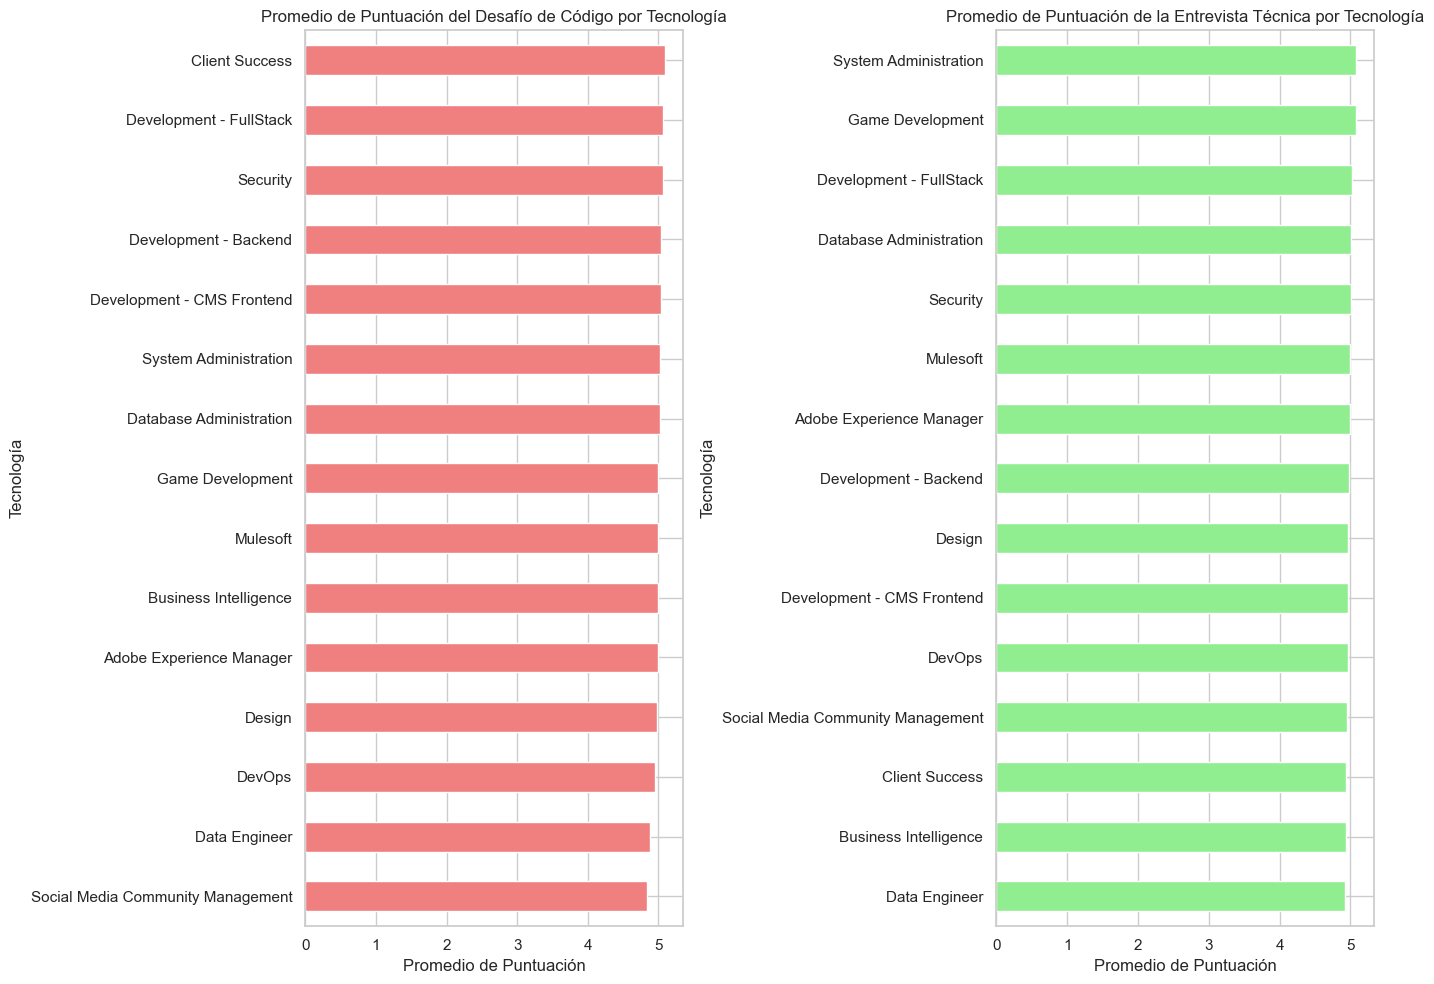

In [18]:
tech_scores = candidatos.groupby('technology')[['code_challenge_score', 'technical_interview_score']].mean().sort_values(by='code_challenge_score', ascending=False)

tech_scores_top = tech_scores[tech_scores.index.isin(top_tech.index)]

plt.figure(figsize=(14, 10))
plt.subplot(1, 2, 1)
tech_scores_top['code_challenge_score'].sort_values().plot(kind='barh', color='lightcoral')
plt.title('Promedio de Puntuación del Desafío de Código por Tecnología')
plt.xlabel('Promedio de Puntuación')
plt.ylabel('Tecnología')
plt.subplot(1, 2, 2)
tech_scores_top['technical_interview_score'].sort_values().plot(kind='barh', color='lightgreen')
plt.title('Promedio de Puntuación de la Entrevista Técnica por Tecnología')
plt.xlabel('Promedio de Puntuación')
plt.ylabel('Tecnología')

plt.tight_layout()
plt.show()


We observe that some technologies, although popular in terms of the number of candidates, show significant variations in the average scores of code challenges and technical interviews. This suggests that the popularity of a technology does not necessarily translate into a high level of technical competence among candidates. The preparation and skills demonstrated in challenges and interviews can vary widely, highlighting the importance of an individualized approach in the selection process, beyond the simple demand for skills in the market.

#### How do the tests work?

In [19]:
min_code_challenge_score = candidatos['code_challenge_score'].min()
max_code_challenge_score = candidatos['code_challenge_score'].max()

min_technical_interview_score = candidatos['technical_interview_score'].min()
max_technical_interview_score = candidatos['technical_interview_score'].max()

(min_code_challenge_score, max_code_challenge_score), (min_technical_interview_score, max_technical_interview_score)


((0, 10), (0, 10))

##### Identification of Hired Candidates Based on Technical Assessments

To identify potentially hired candidates within our dataset, we implemented an approach based on the analysis of scores obtained in two key assessments: code challenges and technical interviews. We established a passing threshold, defining that scores equal to or higher than 7 (on a scale of 0 to 10) in both assessments indicate satisfactory performance that qualifies the candidates as "Hired."

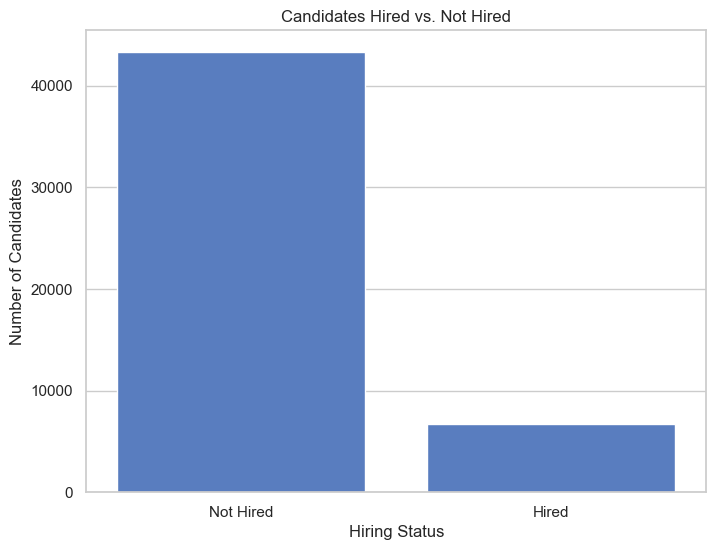

Hired
Not Hired    43302
Hired         6698
Name: count, dtype: int64


In [20]:
candidatos['Hired'] = (candidatos['code_challenge_score'] >= 7) & (candidatos['technical_interview_score'] >= 7)

hired_labels = candidatos['Hired'].map({True: 'Hired', False: 'Not Hired'})

plt.figure(figsize=(8, 6))
sns.countplot(x=hired_labels)
plt.title('Candidates Hired vs. Not Hired')
plt.xlabel('Hiring Status')
plt.ylabel('Number of Candidates')

plt.show()
print(hired_labels.value_counts())

We applied our dataset classification to the candidates as "Hired" and "Not Hired," as a new column, allowing us to quantify and visualize the proportion of candidates who potentially meet the hiring requirements based on their performance in technical assessments


#### Understanding the Hired Candidates

In [21]:
contratados = candidatos[candidatos['Hired']]

puntuaciones_contratados_promedio = contratados[['code_challenge_score', 'technical_interview_score']].mean()

puntuaciones_contratados_promedio

code_challenge_score         8.500000
technical_interview_score    8.479248
dtype: float64

These results show that the hired candidates, on average, not only meet the minimum scoring criterion (greater than or equal to 7) but significantly exceed it, indicating a high level of competence in their technical skills assessed by these criteria.

Seniority by Hired Candidates

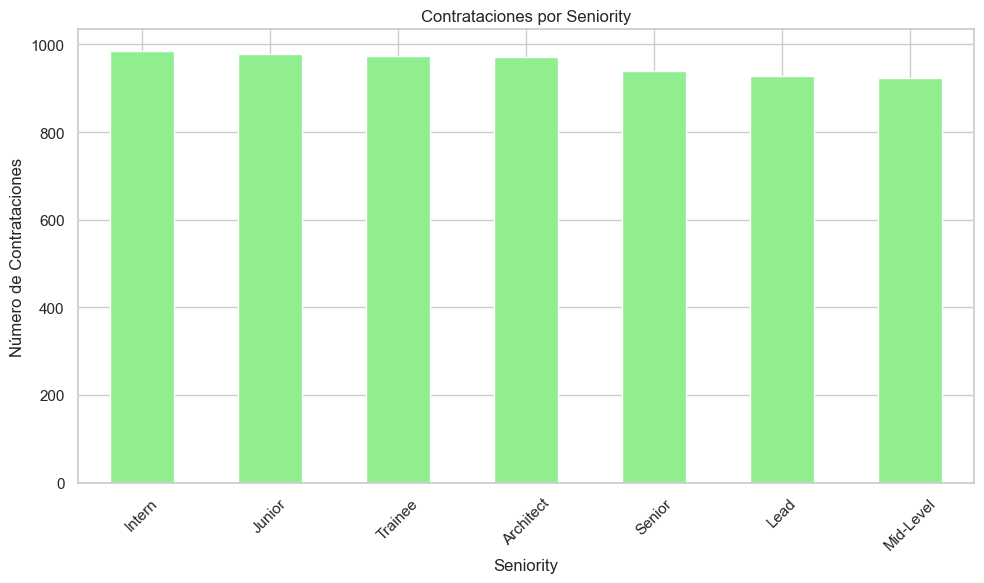

In [22]:
hires_by_seniority = candidatos[candidatos['Hired'] == True].groupby('seniority').size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
hires_by_seniority.plot(kind='bar', color='lightgreen')
plt.title('Contrataciones por Seniority')
plt.xlabel('Seniority')
plt.ylabel('Número de Contrataciones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The analysis of hires by seniority level reveals a balanced approach in the selection process, with Junior, Architect, and Intern levels showing the highest hiring rates, reflecting significant demand for specialized skills and the appreciation of new perspectives

In [23]:
yoe_seniority_scores_contratados = contratados.groupby('seniority').agg({
    'yoe': 'mean',
    'code_challenge_score': 'mean',
    'technical_interview_score': 'mean'
}).reset_index()

yoe_seniority_scores_contratados

,seniority,yoe,code_challenge_score,technical_interview_score
0,Architect,15.010299,8.488157,8.434604
1,Intern,15.134010,8.511675,8.509645
2,Junior,15.433982,8.459570,8.472876
3,Lead,15.622174,8.446717,8.511302
4,Mid-Level,15.445887,8.544372,8.495671
5,Senior,15.399361,8.528222,8.483493
6,Trainee,15.020555,8.522097,8.449126


Comparing these results with the analysis conducted for the total candidate pool, we observe that:

The average years of experience are similar between the hired candidates and the total pool, remaining around 15 years on average for all seniority levels.
The average scores in both code challenges and technical interviews are higher among the hired candidates, as expected given the selection criterion (scores >= 7 to be considered hired). This contrasts with the lower average scores observed in the total candidate pool, indicating that scores are indeed a determining factor for hiring.
Within the hired candidates, there are no major differences in average scores between different seniority levels, suggesting that the demonstrated skill through scores in code challenges and technical interviews is consistent across seniority levels among those who are hired.

Hiring Rate by Seniority

In [24]:
total_candidates_by_seniority = candidatos['seniority'].value_counts()

hired_candidates_by_seniority = candidatos[candidatos['Hired'] == True]['seniority'].value_counts()

hiring_rate_by_seniority = (hired_candidates_by_seniority / total_candidates_by_seniority).sort_values(ascending=False)

hiring_rate_by_seniority


seniority
Junior       0.137606
Architect    0.137166
Intern       0.135768
Trainee      0.135459
Senior       0.133022
Lead         0.131382
Mid-Level    0.127396
Name: count, dtype: float64

These rates suggest that, although there is significant competition across all seniority levels, candidates at the Junior, Architect, and Intern levels have slightly higher success rates in the selection process. The hiring rate has relatively similar rates, although with slight variations among them.

Hiring Analysis by Technologies

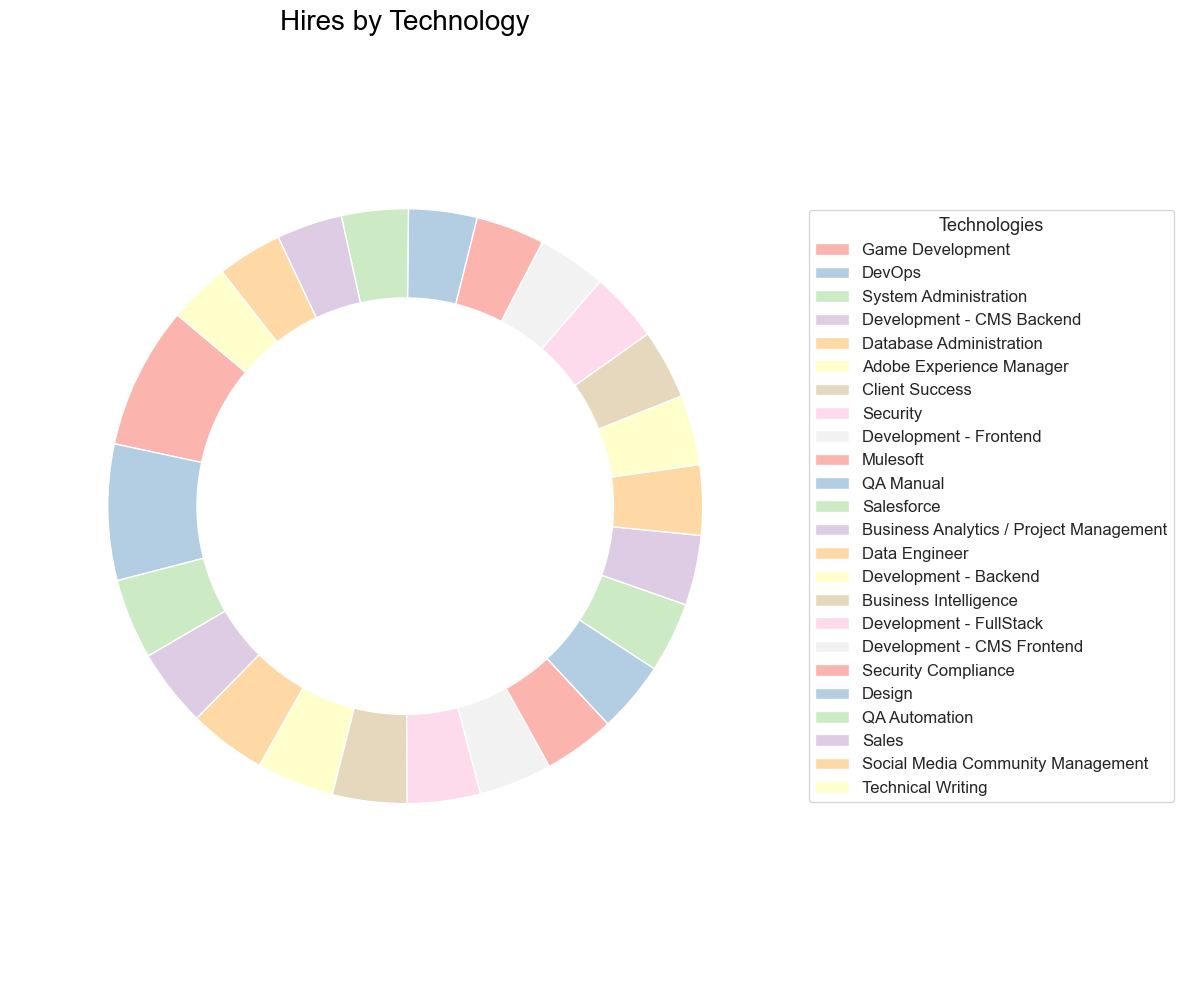

In [25]:
technologies_hired = contratados['technology'].value_counts()

colors = plt.cm.Pastel1.colors  

plt.figure(figsize=(12, 10)) 

def absolute_value(val):
    a = np.round(val/100.*technologies_hired.sum(), 0)
    return int(a)

wedges, texts, autotexts = plt.pie(
    technologies_hired, 
    autopct=absolute_value, 
    colors=colors, 
    startangle=140,
    textprops={'color':"w", 'weight':'bold', 'fontsize':12}
)

plt.title('Hires by Technology', color='black', fontsize=20)
plt.axis('equal') 

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(wedges, technologies_hired.index, title="Technologies", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, title_fontsize='13')

plt.tight_layout() 
plt.show()

We investigated whether certain technologies are more popular among hires at different seniority levels:

In [26]:
tecnologia_seniority_contratados = contratados.groupby(['seniority', 'technology']).size().unstack(fill_value=0)

tecnologia_seniority_contratados_top = tecnologia_seniority_contratados.T.sort_values(by='Senior', ascending=False).head(10).T

tecnologia_seniority_contratados_top


technology,Game Development,DevOps,Development - CMS Backend,Social Media Community Management,Mulesoft,Database Administration,Data Engineer,Development - Backend,Security Compliance,Security
seniority,,,,,,,,,,
Architect,71,66,40,35,40,46,36,31,33,47
Intern,80,76,39,38,40,42,41,49,31,39
Junior,76,80,35,25,36,44,35,28,42,36
Lead,69,64,38,37,32,32,38,39,35,27
Mid-Level,67,65,42,33,39,37,35,29,30,38
Senior,84,74,43,43,43,42,41,41,40,40
Trainee,72,70,47,26,30,39,29,38,39,39


The analysis of technologies by seniority level among the hired candidates shows which technological areas are the most popular or in demand at different experience levels, where Game Development and DevOps stand out as the technologies with the highest number of hires in several seniority levels, indicating a robust and consistent demand in these fields.

Hiring Rates for Each Technology:

In [27]:
total_candidates_by_technology = candidatos['technology'].value_counts()
hired_candidates_by_technology = candidatos[candidatos['Hired'] == True]['technology'].value_counts()
hiring_rate_by_technology = (hired_candidates_by_technology / total_candidates_by_technology).sort_values(ascending=False)

hiring_rate_by_technology


technology
Development - CMS Backend                  0.150903
Database Administration                    0.145887
System Administration                      0.145482
Adobe Experience Manager                   0.144319
Development - Frontend                     0.140964
Client Success                             0.140633
Security                                   0.137397
Salesforce                                 0.136606
QA Manual                                  0.136172
Game Development                           0.135935
Business Analytics / Project Management    0.135783
Security Compliance                        0.134989
Mulesoft                                   0.131779
Business Intelligence                      0.131334
Data Engineer                              0.130702
Design                                     0.130640
DevOps                                     0.129989
Development - CMS Frontend                 0.129783
Development - Backend                      0.129771
D

The analysis of hiring rates by technology provides a detailed insight into how specific technological specializations influence the success of candidates in the selection process

In [28]:
technology_categories = {
    'Data Engineer': 'Data Engineering',
    'Client Success': 'Client Relations & Management',
    'Sales': 'Client Relations & Management',
    'QA Manual': 'Quality Assurance & Security',
    'QA Automation': 'Quality Assurance & Security',
    'Security': 'Quality Assurance & Security',
    'Security Compliance': 'Quality Assurance & Security',
    'Social Media Community Management': 'Marketing & Communications',
    'Adobe Experience Manager': 'Marketing & Communications',
    'Game Development': 'Development & Engineering',
    'Development - CMS Backend': 'Development & Engineering',
    'Development - CMS Frontend': 'Development & Engineering',
    'Development - Backend': 'Development & Engineering',
    'Development - Frontend': 'Development & Engineering',
    'Development - FullStack': 'Development & Engineering',
    'Mulesoft': 'Systems & Operations',
    'DevOps': 'Systems & Operations',
    'System Administration': 'Systems & Operations',
    'Database Administration': 'Systems & Operations',
    'Business Analytics / Project Management': 'Business & Management Analytics',
    'Business Intelligence': 'Business & Management Analytics',
    'Design': 'Design & Content',
    'Technical Writing': 'Design & Content',
    'Salesforce': 'Platform Specific'
}

candidatos['Category'] = candidatos['technology'].map(technology_categories)

print(candidatos[['technology', 'Category']].head())


                          technology                       Category
0                      Data Engineer               Data Engineering
1                      Data Engineer               Data Engineering
2                     Client Success  Client Relations & Management
3                          QA Manual   Quality Assurance & Security
4  Social Media Community Management     Marketing & Communications


Hires by year

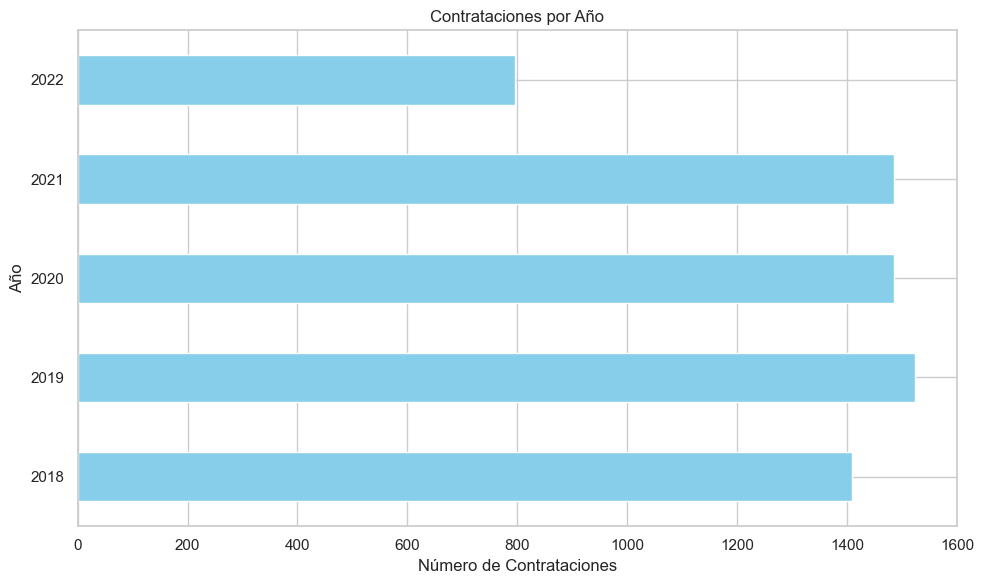

In [29]:
candidatos['application_date'] = candidatos['application_date'].dt.year
hires_by_year = candidatos[candidatos['Hired'] == True].groupby('application_date').size()

plt.figure(figsize=(10, 6))
hires_by_year.plot(kind='barh', color='skyblue')
plt.title('Contrataciones por Año')
plt.xlabel('Número de Contrataciones')
plt.ylabel('Año')
plt.tight_layout()
plt.show()

Performance Analysis by Year:

In [30]:
puntuaciones_promedio_por_año = candidatos.groupby('application_date').agg({
    'code_challenge_score': 'mean',
    'technical_interview_score': 'mean'
}).reset_index()

total_aplicaciones_por_año = candidatos.groupby('application_date').size()
contratados_por_año = candidatos[candidatos['Hired'] == True].groupby('application_date').size()
tasa_contratacion_por_año = (contratados_por_año / total_aplicaciones_por_año * 100).reset_index(name='Tasa de Contratación (%)')


puntuaciones_y_tasa_contratacion = pd.merge(puntuaciones_promedio_por_año, tasa_contratacion_por_año, on='application_date')
puntuaciones_y_tasa_contratacion


,application_date,code_challenge_score,technical_interview_score,Tasa de Contratación (%)
0,2018,4.960853,4.978573,12.738450
1,2019,4.993187,5.026705,13.843219
2,2020,4.991457,4.973036,13.215271
3,2021,5.030133,5.065514,13.437698
4,2022,5.016129,4.949663,14.090748


The proportion of hired candidates relative to the total number of applications has shown a slightly upward trend from 2018 to 2022. Starting with a hiring rate of 12.74% in 2018, we have seen a gradual increase to reach 14.09% in 2022.

Hiring Analysis by Country Over the Years (USA, Brazil, Colombia, and Ecuador)

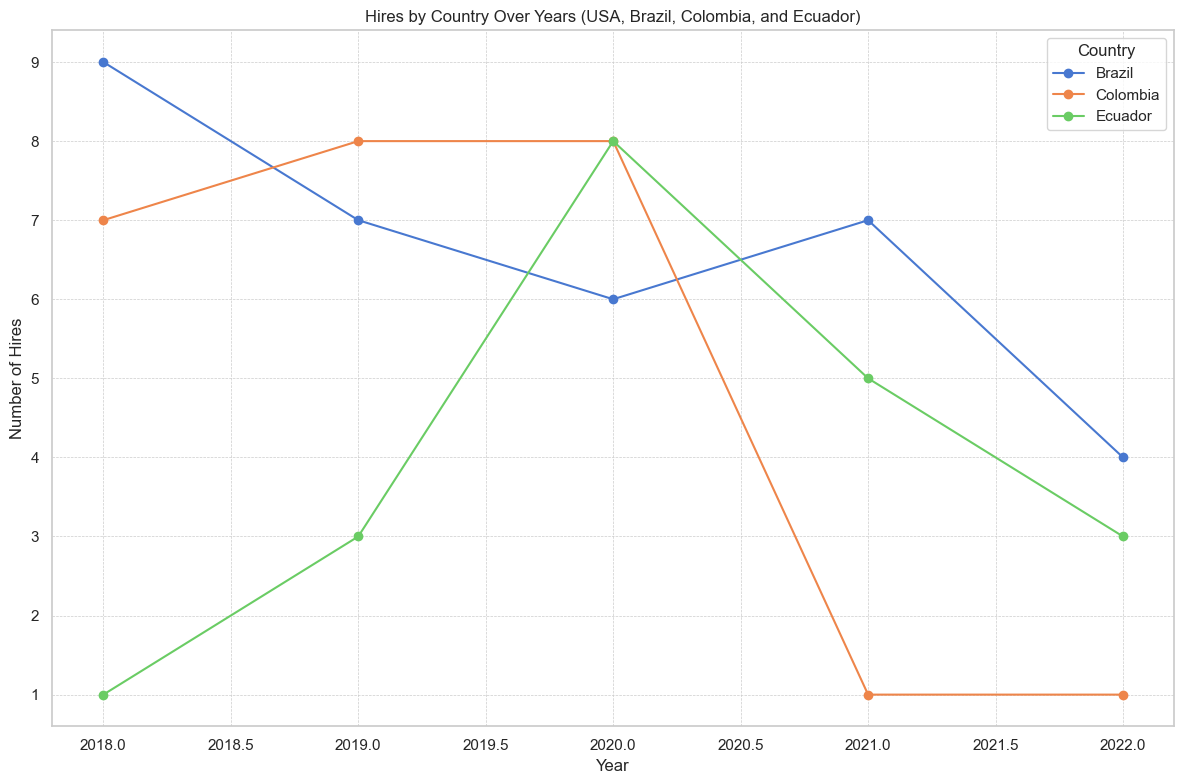

In [31]:
paises_interes = ['USA', 'Brazil', 'Colombia', 'Ecuador']
df_filtrado = candidatos[candidatos['country'].isin(paises_interes) & candidatos['Hired']]

contrataciones_por_pais_y_año = df_filtrado.groupby(['application_date', 'country']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
for pais in contrataciones_por_pais_y_año.columns:
    plt.plot(contrataciones_por_pais_y_año.index, contrataciones_por_pais_y_año[pais], label=pais, marker='o')

plt.title('Hires by Country Over Years (USA, Brazil, Colombia, and Ecuador)')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.legend(title='Country')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


The analysis of hires in the USA, Brazil, Colombia, and Ecuador highlights the dominance and steady growth of the USA and Brazil as key markets for talent acquisition, along with the emerging potential and fluctuations in Colombia and Ecuador.

In [32]:
try:
    candidatos.to_sql('candidates_hired', engine, if_exists='replace', index=False)
    print("La tabla 'candidates_hired' ha sido creada y los datos insertados con éxito.")
except Exception as e:
    print(f"Ocurrió un error al guardar los datos en la base de datos: {e}")



La tabla 'candidates_hired' ha sido creada y los datos insertados con éxito.


In [33]:
engine = create_engine(f'postgresql+psycopg2://{db_config["user"]}:{db_config["password"]}@{db_config["host"]}:5432/{db_config["dbname"]}')
candidates_hired = pd.read_sql('SELECT * FROM candidates_hired', engine)

print(candidates_hired.head())


   first_name   last_name                      email  application_date  \
0  Bernadette   Langworth        leonard91@yahoo.com              2021   
1      Camryn    Reynolds        zelda56@hotmail.com              2021   
2       Larue      Spinka   okey_schultz41@gmail.com              2020   
3        Arch      Spinka     elvera_kulas@yahoo.com              2020   
4       Larue  Altenwerth  minnie.gislason@gmail.com              2020   

   country  yoe  seniority                         technology  \
0   Norway    2     Intern                      Data Engineer   
1   Panama   10     Intern                      Data Engineer   
2  Belarus    4  Mid-Level                     Client Success   
3  Eritrea   25    Trainee                          QA Manual   
4  Myanmar   13  Mid-Level  Social Media Community Management   

   code_challenge_score  technical_interview_score  Seniority Level  Hired  \
0                     3                          3              1.0  False   
1       